<center><h1 style="text-align: center;"><u>Pruebas TFM</u></h1>
<center><img src="https://nachocarnes.es/wp-content/uploads/2018/04/ejWGXui6_400x400.png" alt="Drawing" style="align=left"/>

# INTRODUCCIÓN
Este notebook se trata de una plantilla para el análisis, visualización, limpieza y procesado de datos verificando su validez para ser usados como un modelo de predicción mediante el uso de una metodología de regresión lineal múltiple.

Los datos se encontrarán en la ruta : C:\Users\danie\OneDrive\Documentos\Master\Lusku\TFM\Pruebas\Datos

IMPORTANTE : Cada vez que tenga que rellenarse a mano el valor de una variable, se mostrará con : 

                    (I) Introducir valor de 'nombreDeLaVariable'

In [1]:
# Carga de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import skew, kurtosis
from scipy.stats import shapiro
from scipy.stats import normaltest

# Entrenar el modelo
from sklearn.model_selection import train_test_split

# Selección de las variables por tipo
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_selector
from sklearn.impute import SimpleImputer

# Preprocesado y modelado
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm


In [39]:
# Carga de la URL de donde se encuentran los datos 
# (I) Introducir valor de nombreArchivo
nombreArchivo = 'demographic' #nombre del archivo del dataset
url_datos = f'Datos/{nombreArchivo}.csv'

In [5]:
# Se procede a hacer una carga de los datos
df = pd.read_csv(f'{url_datos}')


# 1. ANÁLISIS GENERAL DE LOS DATOS

In [6]:
df.info

<bound method DataFrame.info of         SEQN  SDDSRVYR  RIDSTATR  RIAGENDR  RIDAGEYR  RIDAGEMN  RIDRETH1  \
0      73557         8         2         1        69       NaN         4   
1      73558         8         2         1        54       NaN         3   
2      73559         8         2         1        72       NaN         3   
3      73560         8         2         1         9       NaN         3   
4      73561         8         2         2        73       NaN         3   
...      ...       ...       ...       ...       ...       ...       ...   
10170  83727         8         2         1        26       NaN         2   
10171  83728         8         2         2         2      24.0         1   
10172  83729         8         2         2        42       NaN         4   
10173  83730         8         2         1         7       NaN         2   
10174  83731         8         2         1        11       NaN         5   

       RIDRETH3  RIDEXMON  RIDEXAGM  ...  DMDHREDU  DMD

In [7]:
print(f'{nombreArchivo} dataFrame shape : ' + str(df.shape))

demographic dataFrame shape : (10175, 47)


In [8]:
df.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,DMDHREDU,DMDHRMAR,DMDHSEDU,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
0,73557,8,2,1,69,NaN,4,4,1.0,NaN,...,3.0,4.0,NaN,13281.237386,13481.042095,1,112,4.0,4.0,0.84
1,73558,8,2,1,54,NaN,3,3,1.0,NaN,...,3.0,1.0,1.0,23682.057386,24471.769625,1,108,7.0,7.0,1.78
2,73559,8,2,1,72,NaN,3,3,2.0,NaN,...,4.0,1.0,3.0,57214.803319,57193.285376,1,109,10.0,10.0,4.51
3,73560,8,2,1,9,NaN,3,3,1.0,119.0,...,3.0,1.0,4.0,55201.178592,55766.512438,2,109,9.0,9.0,2.52
4,73561,8,2,2,73,NaN,3,3,1.0,NaN,...,5.0,1.0,5.0,63709.667069,65541.871229,2,116,15.0,15.0,5.00


In [9]:
columns = df.columns
columns

Index(['SEQN', 'SDDSRVYR', 'RIDSTATR', 'RIAGENDR', 'RIDAGEYR', 'RIDAGEMN',
       'RIDRETH1', 'RIDRETH3', 'RIDEXMON', 'RIDEXAGM', 'DMQMILIZ', 'DMQADFC',
       'DMDBORN4', 'DMDCITZN', 'DMDYRSUS', 'DMDEDUC3', 'DMDEDUC2', 'DMDMARTL',
       'RIDEXPRG', 'SIALANG', 'SIAPROXY', 'SIAINTRP', 'FIALANG', 'FIAPROXY',
       'FIAINTRP', 'MIALANG', 'MIAPROXY', 'MIAINTRP', 'AIALANGA', 'DMDHHSIZ',
       'DMDFMSIZ', 'DMDHHSZA', 'DMDHHSZB', 'DMDHHSZE', 'DMDHRGND', 'DMDHRAGE',
       'DMDHRBR4', 'DMDHREDU', 'DMDHRMAR', 'DMDHSEDU', 'WTINT2YR', 'WTMEC2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDHHIN2', 'INDFMIN2', 'INDFMPIR'],
      dtype='object')

In [34]:
# Verificar valores nulos
print("\nValores nulos en el conjunto de datos:")
null_values = pd.DataFrame({
    'Valores Nulos': df.isnull().sum()})
null_values


Valores nulos en el conjunto de datos:


,Valores Nulos
SEQN,0
SDDSRVYR,0
RIDSTATR,0
RIAGENDR,0
RIDAGEYR,0
RIDAGEMN,9502
RIDRETH1,0
RIDRETH3,0
RIDEXMON,362
RIDEXAGM,5962


## 1.1 Visualización de los datos sin procesar

<Axes: >

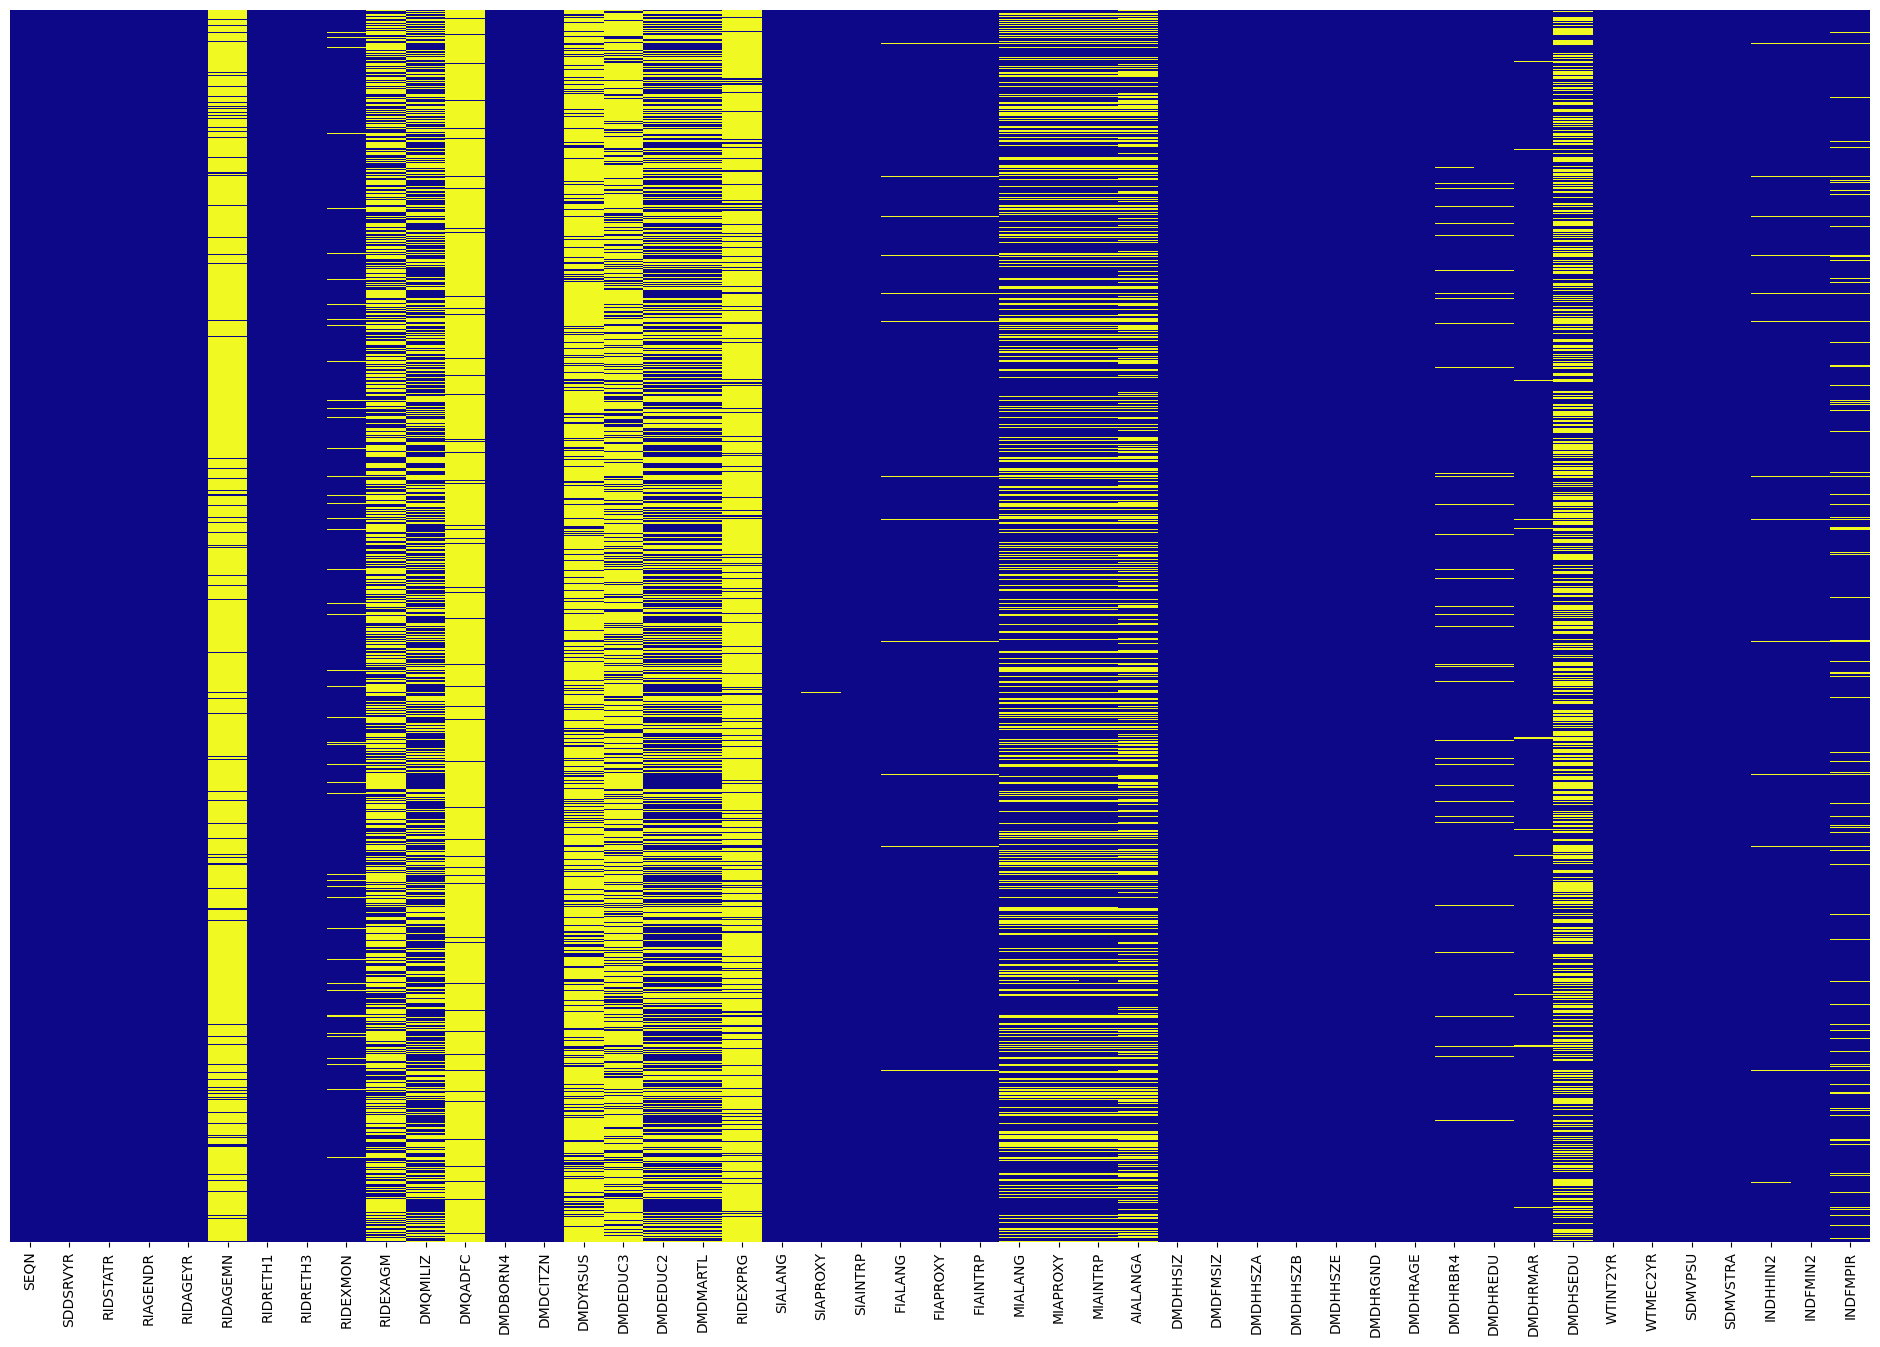

In [10]:
# Verificar valores nulos con seaborn.heatmap()
plt.figure(figsize=(24, 16))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False,cmap='plasma')

In [ ]:
# Boxplot de los datos
plt.rcParams['figure.figsize'] = (24, 16)
df.boxplot()
plt.show()

In [ ]:
# Visualización de los datos mediante la función pairplot()
sns.set(style="ticks", color_codes=True)
sns.pairplot(datos, diag_kind="kde")
plt.show()

In [ ]:
# Visualización de la distribución de las variables numéricas
print("Distribución de las variables numéricas:")
num_cols = df.select_dtypes(include=np.number).columns.tolist()
for col in num_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.show()

In [23]:
# Visualización de la distribución de las variables categóricas
num_cols = df.select_dtypes(include='object').columns.tolist()
if len(num_cols) > 1:
    print("Distribución de las variables categóricas:")
    for col in num_cols:
        plt.figure(figsize=(8, 5))
        sns.histplot(df[col], kde=True)
        plt.title(f"Distribución de {col}")
        plt.xlabel(col)
        plt.ylabel("Frecuencia")
        plt.show()
else :
    print("[ERROR] No hay suficientes variables categóricas para visualizar la distribución de los datos de las variables categóricas")

[ERROR] No hay suficientes variables categóricas para visualizar la distribución de los datos de las variables categóricas


In [ ]:
# Visualización comparativa entre ciertas columnas de la tabla para sacar conclusiones.

## 1.2 Correlaciones

In [38]:
# Función para convertir una matrix de correlación de pandas en formato tidy
def tidy_corr_matrix(corr_mat):
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

corr_matrix = df.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix = tidy_corr_matrix(corr_matrix)
tidy_corr_matrix.head(20)


,variable_1,variable_2,r,abs_r
349,RIDEXAGM,RIDAGEYR,0.998755,0.998755
139,RIDAGEYR,RIDEXAGM,0.998755,0.998755
350,RIDEXAGM,RIDAGEMN,0.995938,0.995938
185,RIDAGEMN,RIDEXAGM,0.995938,0.995938
216,RIDRETH1,RIDRETH3,0.968423,0.968423
261,RIDRETH3,RIDRETH1,0.968423,0.968423
1762,WTINT2YR,WTMEC2YR,0.966661,0.966661
1807,WTMEC2YR,WTINT2YR,0.966661,0.966661
1293,DMDFMSIZ,DMDHHSIZ,0.936793,0.936793
1248,DMDHHSIZ,DMDFMSIZ,0.936793,0.936793


In [ ]:
# Visualización de la correlación GLOBAL de los datos del dataFrame
correlation_matrix = df.corr()
plt.figure(figsize=(24, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación del DataFrame')
plt.show()

In [ ]:
# Visualización de la correlación entre variables NUMÉRICAS
numeric_correlation_matrix = df.select_dtypes(include=np.number).corr()
plt.figure(figsize=(24, 20))
sns.heatmap(numeric_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación del DataFrame')
plt.show()

In [16]:
# Visualización de la correlación entre variables CATEGÓRICAS
print("Correlación entre variables categóricas:")
cat_cols = df.select_dtypes(include='object').columns.tolist()
if len(cat_cols) > 1:
    cat_corr_matrix = df[cat_cols].apply(lambda x: x.factorize()[0]).corr()
    plt.figure(figsize=(24, 16))
    sns.heatmap(cat_corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title("Correlación entre variables categóricas")
    plt.show()
else:
    print("[ERROR] No hay suficientes variables categóricas para calcular la correlación.")


Correlación entre variables categóricas:
No hay suficientes variables categóricas para calcular la correlación.


# 2. ANÁLISIS PROFUNDO DE LOS DATOS

In [ ]:
# Visualización de la distribución de las variables numéricas + verificación la ASIMETRÍA y la CURTOSIS de la distribución
print("Distribución de las variables numéricas:")
num_cols = df.select_dtypes(include=np.number).columns.tolist()
for col in num_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.show()
        
    # Verificar la asimetría y la curtosis de la distribución
    skewness = skew(df[col])
    kurt = kurtosis(df[col])
    print(f"Asimetría de {col}: {skewness}")
    print(f"Curtosis de {col}: {kurt}")
    print("\n")
        
    # Prueba de normalidad
    stat, p = shapiro(df[col])
    print(f"Prueba de Shapiro para {col}: Estadística={stat}, p-valor={p}")
    if p > 0.05:
        print(f"La distribución de {col} parece normal")
    else:
        print(f"La distribución de {col} no parece normal")
    print("\n")
        
    # Prueba de normalidad alternativa
    stat, p = normaltest(df[col])
    print(f"Prueba de normalidad alternativa para {col}: Estadística={stat}, p-valor={p}")
    if p > 0.05:
        print(f"La distribución de {col} parece normal")
    else:
        print(f"La distribución de {col} no parece normal")
    print("\n")

# 3. DEFINIENDO LAS FUNCIONES

In [5]:
# FUNCIONES
# Función de limpieza de datos total del dataFrame
def limpiar_datos(df):
    from sklearn.preprocessing import StandardScaler, OneHotEncoder
    from sklearn.impute import SimpleImputer
    """
    Realiza la limpieza de datos en un DataFrame, incluyendo imputación de valores faltantes, 
    escalado y codificación one-hot para variables categóricas.

    Args:
        df (pandas.DataFrame): El DataFrame que contiene los datos.

    Returns:
        pandas.DataFrame: El DataFrame con los datos limpios, escalados y codificados.
    """
    # Separar variables numéricas y categóricas
    df_numeric = df.select_dtypes(include=np.number)
    df_categorical = df.select_dtypes(exclude=np.number)
    
    # Imputación de valores faltantes para variables numéricas
    imputer = SimpleImputer(strategy='mean')
    df_imputed = pd.DataFrame(imputer.fit_transform(df_numeric), columns=df_numeric.columns)
    
    # Escalado de variables numéricas
    scaler = StandardScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(df_imputed), columns=df_imputed.columns)
    
    # Codificación one-hot para variables categóricas
    encoder = OneHotEncoder(drop='first', sparse=False)
    df_encoded = pd.DataFrame(encoder.fit_transform(df_categorical), columns=encoder.get_feature_names_out(df_categorical.columns))
    
    # Unir los DataFrames de variables numéricas escaladas y categóricas codificadas
    df_cleaned = pd.concat([df_scaled, df_encoded], axis=1)
    
    return df_cleaned

# Función para limpiar una columna particular pasada como parámetro a la función
def limpiar_columna(columna):
    from sklearn.preprocessing import StandardScaler, OneHotEncoder
    from sklearn.impute import SimpleImputer
    """
    Realiza la limpieza de datos para una columna específica del DataFrame, incluyendo imputación de valores faltantes 
    y escalado para variables numéricas, y codificación one-hot para variables categóricas.

    Args:
        df (pandas.DataFrame): El DataFrame que contiene los datos.
        columna (str): El nombre de la columna a limpiar.

    Returns:
        pandas.Series: La columna limpiada.
    """
    # Verificar si la columna es numérica o categórica
    if pd.api.types.is_numeric_dtype(df[columna]):
        # Imputación de valores faltantes con la media
        imputer = SimpleImputer(strategy='mean')
        df[columna] = imputer.fit_transform(df[[columna]])
        
        # Escalado de datos
        scaler = StandardScaler()
        df[columna] = scaler.fit_transform(df[[columna]])
    else:
        # Imputación de valores faltantes con la moda
        imputer = SimpleImputer(strategy='most_frequent')
        df[columna] = imputer.fit_transform(df[[columna]])
        
        # Codificación one-hot para variables categóricas
        encoder = OneHotEncoder(drop='first', sparse=False)
        encoded_data = encoder.fit_transform(df[[columna]])
        column_names = encoder.get_feature_names_out([columna])
        df_encoded = pd.DataFrame(encoded_data, columns=column_names)
        
        # Eliminar la columna original y agregar las columnas codificadas
        df = pd.concat([df.drop(columns=[columna]), df_encoded], axis=1)
    
    return df[columna]

# ---------------------------------------------------------------------------------------------

# Función para eliminar filas y columnas (normalmente por carecer de datos suficientes)
# Eliminar filas con valores faltantes
def eliminar_filas_con_nulos(df, columna):
    return df.dropna(subset=[columna], inplace=True)

# Elimina la columna pasada como parámetro
def eliminar_col(columnName):
    df.drop(columns = columnName, inplace=True)
# --------------------------------------------------------------------

# Funciones para rellenar valores faltantes
# Rellenar con la media o la mediana (variables numéricas)
def fill_mean_or_median(columnName,value):
    if value == 'mean':
        df[columnName].fillna(df[columnName].mean(), inplace=True)
    elif value == 'median':
        df[columnName].fillna(df[columnName].median(), inplace=True)

# Rellenar con la moda (variables categóricas)
def fill_mode(columnName):
    df[columnName].fillna(df[columnName].mode().iloc[0], inplace=True)

# Rellenar valores faltantes con un valor específico (variables numéricas o categóricas)
def fill_with_value(columnName,value) :
    df[columnName].fillna(value=value, inplace=True)

# Rellenar valores faltantes con el valor siguiente (variables ordenadas en el tiempo)
def fill_with_forward(columnName):
    df[columnName].fillna(method='ffill', inplace=True)

# Rellenar valores faltantes con el valor anterior (variables ordenadas en el tiempo)
def fill_with_back(columnName):
    df[columnName].fillna(method='bfill', inplace=True)

# Interpolación lineal para rellenar valores faltantes (variables numéricas ordenadas)
def fill_with_interpolation(columnName) :
    df[columnName].interpolate(method='linear', inplace=True)

# 4. ACCIONES DE LIMPIEZA SOBRE LOS DATOS

In [ ]:
#REHACER
# TOMAR ACCIONES DE LIMPIEZA SOBRE LOS DATOS

# Eliminar los datos duplicados
df = df.drop_duplicates()

# Aplicar las funciones de limpieza según el tipo de datos
for col_name in df.columns:
    if data_types[col_name] == np.number: # si la columna es numérica
        df[col_name] = clean_numeric(df[col_name]) # aplicar la función clean_numeric
    elif data_types[col_name] == np.object: # si la columna es categórica
        df[col_name] = clean_categorical(df[col_name]) # aplicar la función clean_categorical
    else:
        pass # si la columna es de otro tipo, no hacer nada

# Imputar los valores que faltan
df = df.fillna(df.mode().iloc[0]) # reemplazar los valores nulos por la moda de cada columna

# Consolidar los datos
df = df.merge(df2, on="id") # unir el dataset con otro dataset usando la columna id como clave
df = df.groupby("categoria").agg({"precio": "mean", "calificacion": "max"}) # agrupar el dataset por la columna categoria y calcular la media del precio y el máximo de la calificacion

# Explorar los datos
df.describe() # obtener un resumen estadístico de las columnas numéricas
df["categoria"].value_counts() # obtener la frecuencia de cada valor en la columna categoria
df.corr() # obtener la matriz de correlación entre las columnas numéricas
df.plot(kind="scatter", x="precio", y="calificacion") # crear un gráfico de dispersión entre las columnas precio y calificacion

# 5. OBTENCION DEL TRAIN y TEST SET

In [ ]:
# (I) Introducir valor de variableAPredecir
variableAPredecir = 'variableAPredecir'
X_train, X_test, y_train, y_test = train_test_split(
                                        df.drop(variableAPredecir, axis = 'columns'),
                                        df[variableAPredecir],
                                        train_size   = 0.8,
                                        random_state = 42,
                                        shuffle      = True
                                    )

# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)


# 6. ESTANDARIZACIÓN/NORMALIZACIÓN DE LAS COLUMNAS NUMÉRICAS Y BINARIZACION DE LAS VARIABLES CATEGÓRICAS

Cuando los predictores son numéricos, la escala en la que se miden, así como la magnitud de su **varianza** pueden influir en gran medida en el modelo. Muchos algoritmos de machine learning (SVM, redes neuronales, lasso...) son sensibles a esto, de forma que, si no se igualan de alguna forma los predictores, aquellos que se midan en una escala mayor o que tengan más varianza dominarán el modelo aunque no sean los que más relación tienen con la variable respuesta.

**Normalización** (estandarización): consiste en transformar los datos de forma que todos los predictores estén aproximadamente en la misma escala. 

    Hay dos formas de lograrlo:
    - Normalización Z-score (`StandardScaler`): dividir cada predictor entre su desviación típica después de haber sido centrado, de esta forma, los datos pasan a tener una distribución normal.
    - Estandarización max-min (`MinMaxScaler`): transformar los datos de forma que estén dentro del rango `[0, 1]`.

**Binarización de las variables cualitativas :**

    La binarización (*one-hot-encoding*) consiste en crear nuevas variables *dummy* con cada uno de los niveles de las variables cualitativas.

In [ ]:
# Selección de las variables por tipo
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector

# Se estandarizan las columnas numéricas y se hace one-hot-encoding de las 
# columnas cualitativas. Para mantener las columnas a las que no se les aplica 
# ninguna transformación se tiene que indicar remainder='passthrough'.
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()

preprocessor = ColumnTransformer(
                   [('scale', StandardScaler(), numeric_cols),
                    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)],
                remainder = 'passthrough',
                verbose_feature_names_out = False
               ).set_output(transform="pandas")

X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep  = preprocessor.transform(X_test)

X_train_prep.head(3)

# 7. CREACIÓN DEL MODELO

El siguiente paso tras definir los datos de entrenamiento, es seleccionar el algoritmo que se va a emplear. En **scikit-learn**, esto se hace mediante la creación de un objeto `estimator`. En concreto, este objeto almacena el nombre del algoritmo, sus parámetros e hiperparámetros y contiene los métodos `fit(X, y)` y `predict(y_)` que le permiten aprender de los datos y predecir nuevas observaciones.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

modelo = sm.OLS(endog=y_train, exog=X_train_prep)
modelo = modelo.fit() # Ajustar el modelo a los datos encontrando los coeficientes que mejor se ajustan a los datos
# "modelo" contiene información sobre el modelo ajustado
print(modelo.summary())

Para validar el peso que tiene cada columna (cada variable independiente Xi) en la predicción del valor de la variable dependiente "Y", se puede ver con la función modelo.summary() : 

[Ejemplo]

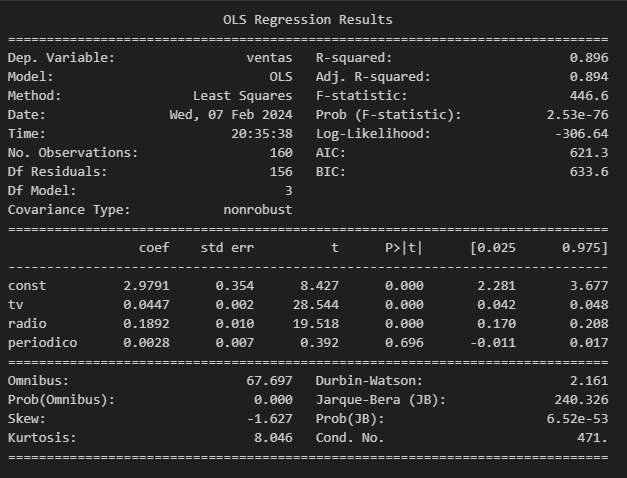

- El coeficiente de rdeterminación R² (0 < R² < 1) proporciona una medida de qué tan bien las variables independientes (predictoras) explican la variabilidad observada en la variable dependiente. En este caso tiene un valor más cercano a 1, queriendo decir que las variables independientes son más proclives a predecir la variable dependiente con mayor fiabilidad. **CUIDADO -->** R² aumentará cada vez que se agregue una nueva variable independiente al modelo, incluso si la nueva variable no mejora realmente la capacidad predictiva del modelo.

- Se observa como el peso del coeficiente del periódico es cercano a 0, queriendo decir que apenas aporta valor a la hora de predecir el valor de Y. (*1)
- Para reafirmarnos, cuando el valor **p es alto** (por lo general, se considera alto si es mayor que un umbral determinado, comúnmente 0.05), no se puede rechazar la hipótesis nula. En otras palabras, no hay suficiente evidencia para afirmar que la variable tenga un efecto significativo en la variable de respuesta.

**En resumen**, un p-value alto para una variable en un modelo de regresión lineal indica que no hay suficiente evidencia para concluir que la variable tiene un efecto significativo en la variable de respuesta, lo que puede tener implicaciones en la interpretación y la utilidad del modelo

(*1)(Habiendo hecho el escalado no se distingue el peso tan bien de cada componente, habría que ejecutar el código siguiente sin escalado y ¿sin one-hot-encoding para las variables categóricas? de los datos para verlo con mayor claridad.

## 7.1 Función para obtener las variables con p-values elevados

In [1]:
def variables_con_pvalue_alto(modelo, X_train_columns):
    # Obtener los p-values de las variables
    pvalues = modelo.pvalues
    
    # Crear una lista para almacenar las variables con p-value alto
    variables_alto_pvalue = []
    
    # Iterar sobre los p-values
    for i in range(len(pvalues)):
        # Si el p-value es mayor que 0.05, agregar la variable a la lista
        if pvalues[i] > 0.05:
            variable = X_train_columns[i]
            coeficiente = modelo.params[i]
            pvalue = pvalues[i]
            variables_alto_pvalue.append((variable, coeficiente, pvalue))
    
    return variables_alto_pvalue

## 7.2 Visualizar variables con p-value elevado (Variable, coeficiente y p-value)

In [ ]:
# Obtener los nombres de las columnas después del preprocesamiento
numeric_cols_names = preprocessor.transformers_[0][2]
categorical_cols_names = preprocessor.transformers_[1][2]

# Concatenar los nombres de las columnas numéricas y categóricas
X_train_columns = numeric_cols_names.tolist() + categorical_cols_names.tolist()

# Llamar a la función variables_con_pvalue_alto con X_train_prep y X_train_columns
variables_alto_pvalue = variables_con_pvalue_alto(modelo, X_train_columns)

# Imprimir las variables con p-value alto
for variable_info in variables_alto_pvalue:
    variable, coeficiente, pvalue = variable_info
    print(f"Variable: {variable}, Coeficiente: {coeficiente}, P-value: {pvalue}")

## 7.3 Función para eliminar las columnas/variables del modelo con p-value elevado

In [ ]:
def eliminar_variables_pvalue_alto(modelo, X_train_prep, X_train_columns):
    # Obtener los p-values de las variables
    pvalues = modelo.pvalues
    
    # Crear una lista para almacenar las variables con p-value alto
    variables_a_eliminar = []
    
    # Iterar sobre los p-values
    for i in range(len(pvalues)):
        # Si el p-value es mayor que 0.05, agregar la variable a la lista
        if pvalues[i] > 0.05:
            variable = X_train_columns[i]
            variables_a_eliminar.append(variable)
    
    # Eliminar las columnas con p-value alto de X_train_prep
    X_train_prep = X_train_prep.drop(variables_a_eliminar, axis=1)
    
    return X_train_prep

In [ ]:
# Uso de la función para eliminar variables con p-value elevado
X_train_prep_sin_pvalue_alto = eliminar_variables_pvalue_alto(modelo, X_train_prep, X_train_columns)

## 7.4 Visualización de la mejora o no con la eliminación de las variables con poco peso en la predicción

In [ ]:
modelo = sm.OLS(endog=y_train, exog=X_train_prep_sin_pvalue_alto)
modelo = modelo.fit()
print(modelo.summary())

# 8. VALIDACIÓN



In [ ]:
# Intervalos de confianza para los coeficientes del modelo
intervalos_ci = modelo.conf_int(alpha=0.05)
intervalos_ci.columns = ['2.5%', '97.5%']
intervalos_ci

In [ ]:
# Diagnóstico errores (residuos) de las predicciones de entrenamiento
prediccion_train = modelo.predict(exog = X_train)
residuos_train   = prediccion_train - y_train

# Normalidad de los residuos Shapiro-Wilk test.
shapiro_test = stats.shapiro(residuos_train)
shapiro_test

In [ ]:
# Normalidad de los residuos D'Agostino's K-squared test
k2, p_value = stats.normaltest(residuos_train)
print(f"Estadítico= {k2}, p-value = {p_value}")


***P-valor***
- El resultado del test de Shapiro-Wilk (shapiro_test) se puede utilizar para evaluar si los residuos siguen una distribución normal. **Si el valor p es menor que un nivel de significancia predefinido (generalmente 0.05)**, se rechaza la hipótesis nula y se concluye que los residuos **no siguen una distribución normal**. 

- Por el contrario, **si el valor p es mayor que el nivel de significancia**, no hay suficiente evidencia para rechazar la hipótesis nula, lo que **sugiere que los residuos podrían seguir una distribución normal**. En este contexto, una distribución normal de los residuos es un supuesto importante para la validez de las pruebas estadísticas y las inferencias realizadas con el modelo de regresión.

***Estadístico***
- **Mayor estadístico** de prueba: Un estadístico de prueba más grande indica que la muestra es más similar a una distribución normal. En otras palabras, si el estadístico de prueba es grande, hay menos evidencia en contra de la hipótesis nula de que los datos provienen de una población normal.

- **Menor estadístico** de prueba: Un estadístico de prueba más pequeño indica que la muestra es menos similar a una distribución normal. Un valor más pequeño del estadístico de prueba implica que hay más discrepancia entre los datos observados y una distribución normal.

H0 : Hipotesis nula, que los datos vengan de una distribución normal

H1 : hipotesis alternativa, no venga de una normal

Ambos test, permiten rechazar la hipótesis nula de que los datos se distribuyen de forma normal (`p-value` << 0.05).

Al ser el p-value muy bajo, quiere decir, que la probabilidad de que se de la hipotisis nula H0 (que los datos vengan de una distr. normal) es muy baja.

Por tanto, se verifica que el modelo no es muy bueno para predecir

R² proporciona una medida de qué tan bien las variables independientes (predictoras) explican la variabilidad observada en la variable dependiente

# 9. Predicción

Una vez que el modelo ha sido entrenado, bien empleando directamente un *estimator* o un *pipeline*, con el método `.predict()` se pueden predecir nuevas observaciones. Si se emplea un pipeline, se aplican automáticamente las transformaciones aprendidas durante el entrenamiento.

In [ ]:
# Predicciones con intervalo de confianza 
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones.head(4)

# 10. Error del test
El módulo `sklearn.metrics` incorpora una variedad considerable de métricas para evaluar la calidad de las predicciones.

In [ ]:
# Error de test del modelo 
X_test = sm.add_constant(X_test, prepend=True)
predicciones = modelo.predict(exog = X_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
)
print("")
print(f"El error (rmse) de test es: {rmse}")

In [ ]:
r2_score(
        y_true  = y_test,
        y_pred  = predicciones)

# 11. INTERPRETACIÓN

---


# Más información
- https://github.com/ydataai/ydata-profiling
- https://www.cienciadedatos.net/documentos/25_regresion_lineal_multiple.html
- https://www.cienciadedatos.net/documentos/py10-regresion-lineal-python.html

Más detalle sobre los test:
- https://www.codecademy.com/learn/how-to-choose-a-linear-regression-model-course/modules/choosing-a-linear-regression-model-course/cheatsheet
- https://timeseriesreasoning.com/contents/skewness-and-kurtosis-measures/
- https://www.accelebrate.com/blog/interpreting-results-from-linear-regression-is-the-data-appropriate